# Multiple analysis between "x categorical" and "y Continuous variable"
### Multiple features vs target

##### [feature 1 & feature 2 vs target]
##### [feature 1 & feature 2 & feature 3 vs target]
- tables
- plots

In [1]:
import os
# fix root path to save outputs
actual_path = os.path.abspath(os.getcwd())
list_root_path = actual_path.split('\\')[:-1]
root_path = '\\'.join(list_root_path)
os.chdir(root_path)
print('root path: ', root_path)

root path:  D:\github-mi-repo\exploratory-data-analysis


### 0. Package and load data

In [2]:
from sklearn.datasets import fetch_california_housing
import json
import pandas as pd
import numpy as np
import seaborn as sns
from itertools import combinations

# plotly
import plotly
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
from plotly.subplots import make_subplots

#### load data categorical features and target generated by percentiles
This is generated in the notebook 0

In [3]:
data_percentile_feature_target = pd.read_pickle('data/df_cat_feature_target.pkl')
data_percentile_feature_target.head()

quartile_MedInc quartile_HouseAge   quartile_AveRooms quartile_AveBedrms  \
0  q4 - (4.74-15.0)  q4 - (37.0-52.0)  q4 - (6.05-141.91)   q2 - (1.01-1.05)   
1  q4 - (4.74-15.0)  q2 - (18.0-29.0)  q4 - (6.05-141.91)   q1 - (0.33-1.01)   
2  q4 - (4.74-15.0)  q4 - (37.0-52.0)  q4 - (6.05-141.91)    q3 - (1.05-1.1)   
3  q4 - (4.74-15.0)  q4 - (37.0-52.0)    q3 - (5.23-6.05)    q3 - (1.05-1.1)   
4  q3 - (3.53-4.74)  q4 - (37.0-52.0)  q4 - (6.05-141.91)    q3 - (1.05-1.1)   

     quartile_Population quartile_AveOccup   quartile_Latitude  \
0       q1 - (3.0-787.0)  q2 - (2.43-2.82)  q4 - (37.71-41.95)   
1  q4 - (1725.0-35682.0)  q1 - (0.69-2.43)  q4 - (37.71-41.95)   
2       q1 - (3.0-787.0)  q2 - (2.43-2.82)  q4 - (37.71-41.95)   
3       q1 - (3.0-787.0)  q2 - (2.43-2.82)  q4 - (37.71-41.95)   
4       q1 - (3.0-787.0)  q1 - (0.69-2.43)  q4 - (37.71-41.95)   

      quartile_Longitude   quartile_Price  
0  q1 - (-124.35--121.8)  q4 - (2.65-5.0)  
1  q1 - (-124.35--121.8)  q4 - (2.65-5.0)  
2  q1 - (-124.35--121.8)  q4 - (2.65-5.0)  
3  q1 - (-124.35--121.8)  q4 - (2.65-5.0)  
4  q1 - (-124.35--121.8)  q4 - (2.65-5.0)

#### load data categorical only features generated by percentiles
This is generated in the notebook 0

In [4]:
data_percentile_feature = pd.read_pickle('data/df_cat_feature.pkl')
data_percentile_feature.head()

Price   quartile_Latitude    quartile_Population quartile_HouseAge  \
0  4.526  q4 - (37.71-41.95)       q1 - (3.0-787.0)  q4 - (37.0-52.0)   
1  3.585  q4 - (37.71-41.95)  q4 - (1725.0-35682.0)  q2 - (18.0-29.0)   
2  3.521  q4 - (37.71-41.95)       q1 - (3.0-787.0)  q4 - (37.0-52.0)   
3  3.413  q4 - (37.71-41.95)       q1 - (3.0-787.0)  q4 - (37.0-52.0)   
4  3.422  q4 - (37.71-41.95)       q1 - (3.0-787.0)  q4 - (37.0-52.0)   

      quartile_Longitude quartile_AveOccup   quartile_AveRooms  \
0  q1 - (-124.35--121.8)  q2 - (2.43-2.82)  q4 - (6.05-141.91)   
1  q1 - (-124.35--121.8)  q1 - (0.69-2.43)  q4 - (6.05-141.91)   
2  q1 - (-124.35--121.8)  q2 - (2.43-2.82)  q4 - (6.05-141.91)   
3  q1 - (-124.35--121.8)  q2 - (2.43-2.82)    q3 - (5.23-6.05)   
4  q1 - (-124.35--121.8)  q1 - (0.69-2.43)  q4 - (6.05-141.91)   

    quartile_MedInc quartile_AveBedrms  
0  q4 - (4.74-15.0)   q2 - (1.01-1.05)  
1  q4 - (4.74-15.0)   q1 - (0.33-1.01)  
2  q4 - (4.74-15.0)    q3 - (1.05-1.1)  
3  q4 - (4.74-15.0)    q3 - (1.05-1.1)  
4  q3 - (3.53-4.74)    q3 - (1.05-1.1)

#### Define data to use in the example, list features, target
In this notebooks only matters the features, so any of the two datasets can be used

In [5]:
### data to used
data = data_percentile_feature.copy()

### target
target = 'Price'

### list_features
list_features = list(set(data.columns.tolist()) - set([target]))

## ANALYSIS I. feature1 & feature 2 vs target
Analysis bivariate 2 features categorical vs target

### 1. Codes to eda

In [6]:
# cross tab feature_x & feature_y with values target
# I want to know the behavior of the target (continuos) between 2 differents features categorical

feature_index_ct = 'quartile_MedInc'
feature_column_ct = 'quartile_HouseAge'
feature_values_ct = 'Price'  # target is a continous variable

ct_mean = pd.crosstab(index = data_percentile_feature[feature_index_ct], 
                      columns = data_percentile_feature[feature_column_ct], 
                      values = data_percentile_feature[feature_values_ct], aggfunc='mean')

ct_mean

quartile_HouseAge  q1 - (1.0-18.0)  q2 - (18.0-29.0)  q3 - (29.0-37.0)  \
quartile_MedInc                                                          
q1 - (0.5-2.56)           1.159299          1.222798          1.217215   
q2 - (2.56-3.53)          1.470188          1.693193          1.655947   
q3 - (3.53-4.74)          1.796835          2.144851          2.138437   
q4 - (4.74-15.0)          2.781631          3.123192          3.311238   

quartile_HouseAge  q4 - (37.0-52.0)  
quartile_MedInc                      
q1 - (0.5-2.56)            1.287692  
q2 - (2.56-3.53)           2.019349  
q3 - (3.53-4.74)           2.646894  
q4 - (4.74-15.0)           3.853793

In [7]:
# cross tab feature_x & feature_y with values target. Doble agg function - OPTION 1
feature_index_ct = 'quartile_MedInc'
feature_column_ct = 'quartile_HouseAge'
feature_values_ct = 'Price'  # target is a continous variable

ct_mean_std = pd.crosstab(index = data_percentile_feature[feature_index_ct], 
                      columns = data_percentile_feature[feature_column_ct], 
                      values = data_percentile_feature[feature_values_ct], 
                          aggfunc = ['mean', 'std'])

ct_mean_std

mean                                    \
quartile_HouseAge q1 - (1.0-18.0) q2 - (18.0-29.0) q3 - (29.0-37.0)   
quartile_MedInc                                                       
q1 - (0.5-2.56)          1.159299         1.222798         1.217215   
q2 - (2.56-3.53)         1.470188         1.693193         1.655947   
q3 - (3.53-4.74)         1.796835         2.144851         2.138437   
q4 - (4.74-15.0)         2.781631         3.123192         3.311238   

                                               std                   \
quartile_HouseAge q4 - (37.0-52.0) q1 - (1.0-18.0) q2 - (18.0-29.0)   
quartile_MedInc                                                       
q1 - (0.5-2.56)           1.287692        0.605228         0.776460   
q2 - (2.56-3.53)          2.019349        0.626166         0.783450   
q3 - (3.53-4.74)          2.646894        0.699666         0.922806   
q4 - (4.74-15.0)          3.853793        0.997905         1.056646   

                                                     
quartile_HouseAge q3 - (29.0-37.0) q4 - (37.0-52.0)  
quartile_MedInc                                      
q1 - (0.5-2.56)           0.672310         0.718878  
q2 - (2.56-3.53)          0.737654         0.976365  
q3 - (3.53-4.74)          0.845044         1.043781  
q4 - (4.74-15.0)          1.144934         1.081451

In [8]:
#### ERROR

# cross tab feature_x & feature_y with values target. Doble agg function - OPTION 2 (two features in the columns)
feature_index_ct = 'quartile_MedInc'
feature_column_ct = 'quartile_HouseAge'
feature_values_ct = 'Price'  # target is a continous variable

# generate a cross tab where the target contiuos is a row and calculate the freq of contiuos target vs pair of features in percentile
ct_freq_target_each_percentile = pd.crosstab(index = data_percentile_feature[feature_values_ct], 
                                             columns = [data_percentile_feature[feature_column_ct], data_percentile_feature[feature_index_ct]])

# aggregation mean std
ct_mean_std = ct_freq_target_each_percentile.agg(['mean', 'std'])
ct_mean_std

quartile_HouseAge q1 - (1.0-18.0)                                    \
quartile_MedInc   q1 - (0.5-2.56) q2 - (2.56-3.53) q3 - (3.53-4.74)   
mean                     0.254295         0.306351         0.368037   
std                      0.890891         0.819005         0.769368   

quartile_HouseAge                  q2 - (18.0-29.0)                   \
quartile_MedInc   q4 - (4.74-15.0)  q1 - (0.5-2.56) q2 - (2.56-3.53)   
mean                      0.457574         0.350599         0.366476   
std                       1.861068         0.995008         0.814475   

quartile_HouseAge                                   q3 - (29.0-37.0)  \
quartile_MedInc   q3 - (3.53-4.74) q4 - (4.74-15.0)  q1 - (0.5-2.56)   
mean                      0.306871         0.366736         0.314680   
std                       0.745235         3.008634         0.825989   

quartile_HouseAge                                                     \
quartile_MedInc   q2 - (2.56-3.53) q3 - (3.53-4.74) q4 - (4.74-15.0)   
mean                      0.321447         0.371421         0.300625   
std                       0.683425         0.854561         3.487762   

quartile_HouseAge q4 - (37.0-52.0)                                    \
quartile_MedInc    q1 - (0.5-2.56) q2 - (2.56-3.53) q3 - (3.53-4.74)   
mean                      0.423477         0.348777          0.29672   
std                       1.214124         0.839136          1.13565   

quartile_HouseAge                   
quartile_MedInc   q4 - (4.74-15.0)  
mean                      0.218116  
std                       4.307475

In [9]:
##### ERROR

# cross tab feature_x & feature_y with values target. Doble agg function - OPTION 2 (two features in the rows)
feature_index_ct = 'quartile_MedInc'
feature_column_ct = 'quartile_HouseAge'
feature_values_ct = 'Price'  # target is a continous variable

# generate a cross tab where the target contiuos is the column and calculate the freq of contiuos target vs pair of features in percentile
ct_freq_target_each_percentile = pd.crosstab(
    index = [data_percentile_feature[feature_column_ct], data_percentile_feature[feature_index_ct]],
    columns = data_percentile_feature[feature_values_ct]
                                            )

# aggregation mean std
ct_mean_std = ct_freq_target_each_percentile.agg(['mean', 'std'])

# multiple column (target values) with freq in each cells
ct_mean_std = ct_mean_std.mul(ct_mean_std.columns, axis=1)
ct_mean_std

Price   0.14999   0.17500   0.22500   0.25000   0.26600   0.26900   0.27500  \
mean   0.037498  0.010937  0.056250  0.015625  0.016625  0.016813  0.017188   
std    0.067078  0.043750  0.129904  0.062500  0.066500  0.067250  0.068750   

Price   0.28300  0.30000   0.32500  ...   4.97400  4.97600  4.98400   4.98600  \
mean   0.017687  0.03750  0.081250  ...  0.310875    0.311   0.3115  0.311625   
std    0.070750  0.10247  0.187639  ...  1.243500    1.244   1.2460  1.246500   

Price   4.98700  4.98800   4.99000   4.99100    5.00000     5.00001  
mean   0.311688  0.31175  0.311875  0.311937   8.437500  301.563103  
std    1.246750  1.24700  1.247500  1.247750  10.282469  427.086789  

[2 rows x 3842 columns]

#### final discovery

In [10]:
# cross tab feature_x & feature_y with values target. Doble agg function - INDEPEDIENT CROSS TABLES
feature_index_ct = 'quartile_MedInc'
feature_column_ct = 'quartile_HouseAge'
feature_values_ct = 'Price'  # target is a continous variable

ct_mean_mean = pd.crosstab(index = data_percentile_feature[feature_index_ct], 
                      columns = data_percentile_feature[feature_column_ct], 
                      values = data_percentile_feature[feature_values_ct], 
                          aggfunc = 'mean') # agg fuction without list

ct_mean_mean

quartile_HouseAge  q1 - (1.0-18.0)  q2 - (18.0-29.0)  q3 - (29.0-37.0)  \
quartile_MedInc                                                          
q1 - (0.5-2.56)           1.159299          1.222798          1.217215   
q2 - (2.56-3.53)          1.470188          1.693193          1.655947   
q3 - (3.53-4.74)          1.796835          2.144851          2.138437   
q4 - (4.74-15.0)          2.781631          3.123192          3.311238   

quartile_HouseAge  q4 - (37.0-52.0)  
quartile_MedInc                      
q1 - (0.5-2.56)            1.287692  
q2 - (2.56-3.53)           2.019349  
q3 - (3.53-4.74)           2.646894  
q4 - (4.74-15.0)           3.853793

#### TODO: 
It can change:
- pair of features used in the analysis - so it needs a for between the features
- also change the analysis - mean, std, min, max, custom agregation, etc.

SO the ways to do this, are:
- subplots for pair of feature calculating one aggregation and save in one file. And other aggregations save in other file
- or subplots for aggregation and save differents files with differents pair of features

Choice:
- first one, subplots for pair of feature

### 2. synthesize analysis - plot a subplots of heatmaps of crosstab between 2 features and one aggregation into target

#### auxiliar function - plot heatmap given a input df cross table in format to plot

In [11]:
def plot_heatmap_crosstable_individual(df_ct, name_table):
    """
    Plot heatmap using the input dataframe with the cross table to plot

    Args
        df_corr (dataframe): dataframe with crosstable to plot

    Return
        fig (figure plotly): fig of plotly with the plot generated
    """
    
    # heatmap
    fig = px.imshow(df_ct, text_auto=True, aspect="auto")
    
    # change title
    fig.update_layout(
      title_text = name_table,
        title_x = 0.5,
    title_font = dict(size = 28)
      )
    
    return fig

#### individual plot

In [12]:
def crosstab_agg_target_2_features(df, feature_index, feature_column, target, agg_target = 'mean'):
    """
    generate crosstable of aggregation of the target between 2 features (feature index and feature column)

    Args
        ------
    
    Return
        df_ct (dataframe): dataframe with the cross table
    """
    # calculate cross_table
    df_ct= pd.crosstab(index = df[feature_index], 
                          columns = df[feature_column], 
                          values = df[target], 
                              aggfunc = agg_target) # agg fuction without list
    
    # round 3 decimals
    df_ct = df_ct.round(3)
    
    return df_ct

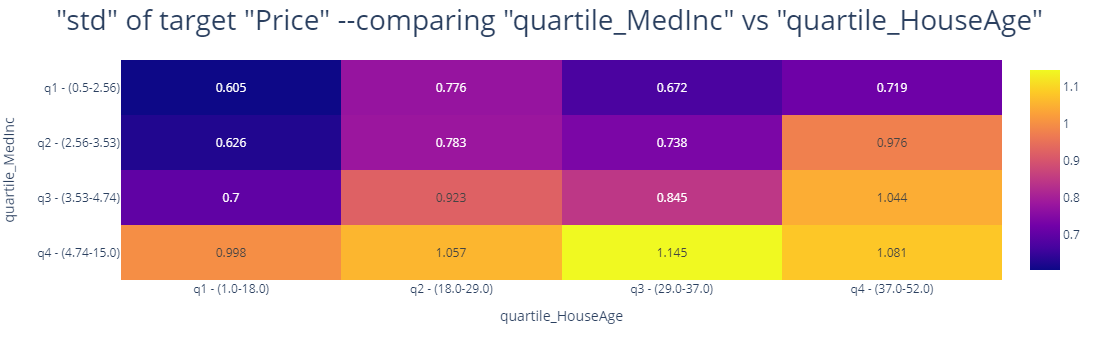

In [13]:
# params
feature_x_ct = 'quartile_MedInc'
feature_y_ct = 'quartile_HouseAge'
target_ct = 'Price'
agg_target_ct = 'std'

# cross table
individual_crosstab_agg_target_2_features = crosstab_agg_target_2_features(df = data_percentile_feature, 
                                                                                              feature_index = feature_x_ct, 
                                                                                              feature_column = feature_y_ct, 
                                                                                              target = target_ct, 
                                                                                              agg_target = agg_target_ct)

# heatmap
individual_heatmap_agg_target_2_features = plot_heatmap_crosstable_individual(individual_crosstab_agg_target_2_features,
                                        name_table = f'"{agg_target_ct}" of target "{target_ct}" --comparing "{feature_x_ct}" vs "{feature_y_ct}"')

# show
individual_heatmap_agg_target_2_features.show()

### subplot
Use the codes to generate multiple heatmap

Description
function to generate heatmap:
    - generate dataframe crosstab (use the individual function to calculate individual crosstab)
    - plot in plotly the crosstab

In [14]:
# auxiliar function to map features in a pair (feature_x, feature_y)
def list_map_combinations_features(list_features, dim_combinations = 2):
    """
    Given a list of features of a dataframe, map all the combinations between each features. combinations without replace and (a,b) is the same (b,a)
    IN PREVIOUS CODES THERE ARE OTHER WAY TO MAP THE FEATURESS, ACUALLY THIS WAY IS BETTER

    Args:
        list_features (list): list of features that will generate the combinations
        dim_combinations (string): dimensions of combinations. default 2 -> generate a pair of features (feature_x, feature_y)

    Return
        list_tuple_combinations (list): list where each element is a tuple with the combination
    """
    # get all the possible combinations withtout repeteat
    todas_combinaciones = combinations(list_features, dim_combinations)
    
    # generate output
    list_tuple_combinations = []
    for comb in todas_combinaciones:
        list_tuple_combinations.append(comb)

    return list_tuple_combinations

In [15]:
def heatmap_crosstab_aggregation_target_2_features(df, target, agg_target = 'mean', number_columns = 1):
    """
    Given a dataframe with columns features + target. Genereate a heatmap of relations between 2 features and one aggregation function of the target
    Detail: 
        Given a dataframe with features categorical, generate a crosstab of aggregation of target between 2 features and plot it in a heatmap
        Calling a individual function to generate a cross table
    
    Args
        df (dataframe): input dataframe with columns features and target
        target (string): target of the dataframe, column that will be delete to plot the relations between only features
        agg_target (string): aggregation function of the target
        number_columns (integer): number of columns. because heatmap could be bigger, plot it into 1 columns by default

    Return
        fig (figure plotly): fig of plotly with the plot generated
    """

    ################# generate a list of tuples of each pair of features to generate the cross table  #####################
    df_only_features = df.drop(columns = target) # delete target of the data
    list_pair_features = list_map_combinations_features(df_only_features.columns.tolist(), 2)

    
    ####################### plot #################################
    
    # calculate number of rows (considering the number of colums passed as args)
    if (len(list_pair_features) % number_columns) != 0:
        number_rows = (len(list_pair_features) // number_columns) + 1
    else:
        number_rows = (len(list_pair_features) // number_columns)

    # create fig to plot
    fig = make_subplots(rows=number_rows, cols=number_columns, 
                        subplot_titles = tuple([str(tupla) for tupla in list_pair_features]) ### title of each subplots
                       )

    ########## for each tuple of features to plot:
    for index_feature, (feature_x, feature_y) in enumerate(list_pair_features):
        
        # get indexes in the subplot (in plotly the indexes starts in 1)
        row = (index_feature // number_columns) + 1
        column = (index_feature % number_columns) + 1

        
        ## get cross table agg function of target, between 2 features - call the INDIVIDUAL FUNCTION TO GENERATE CROSS TABLE 
        ct_agg_target = crosstab_agg_target_2_features(df = df, 
                                                       feature_index = feature_x, 
                                                       feature_column = feature_y, 
                                                       target = target, 
                                                       agg_target = agg_target)
        
        ## tranform cross table freq between pair of features into a heatmap
        fig_aux = px.imshow(ct_agg_target, text_auto=True, aspect="auto")
        
        # add heatmap to fig global
        fig.add_trace(fig_aux.data[0],
            row = row,
            col = column
        )

    # adjust the shape
    fig.update_layout(
        height = 350 * number_rows,  # largo
        width = 850 * number_columns,  # ancho
        title_text =  f'Cross table betweeen "pair of features" with "{agg_target} of the {target}"',
        title_x=0.5,
        title_font = dict(size = 20)
    )

    return fig

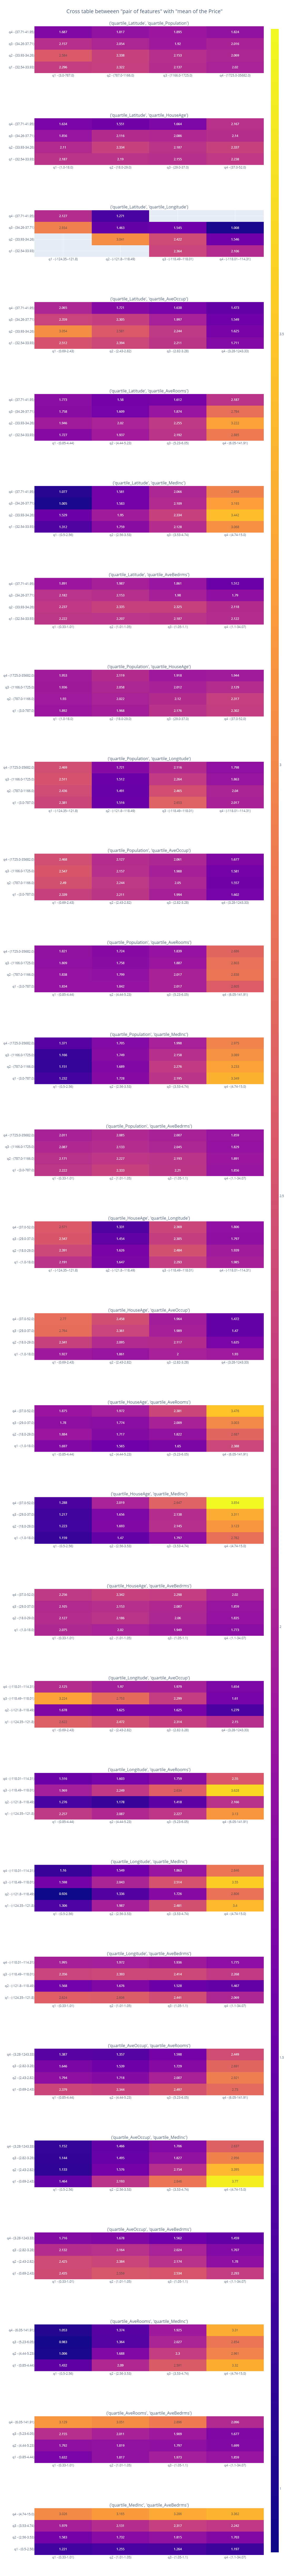

In [16]:
##### MEAN AGG TARGET
fig_crosstab_mean_target_2_features = heatmap_crosstab_aggregation_target_2_features(df = data_percentile_feature, 
                                                                                     target = target, 
                                                                                     agg_target = 'mean', 
                                                                                     number_columns = 1)

fig_crosstab_mean_target_2_features.write_html("output_eda/5_categorical_analysis/crosstab_mean_target_2_features.html")

fig_crosstab_mean_target_2_features.show()

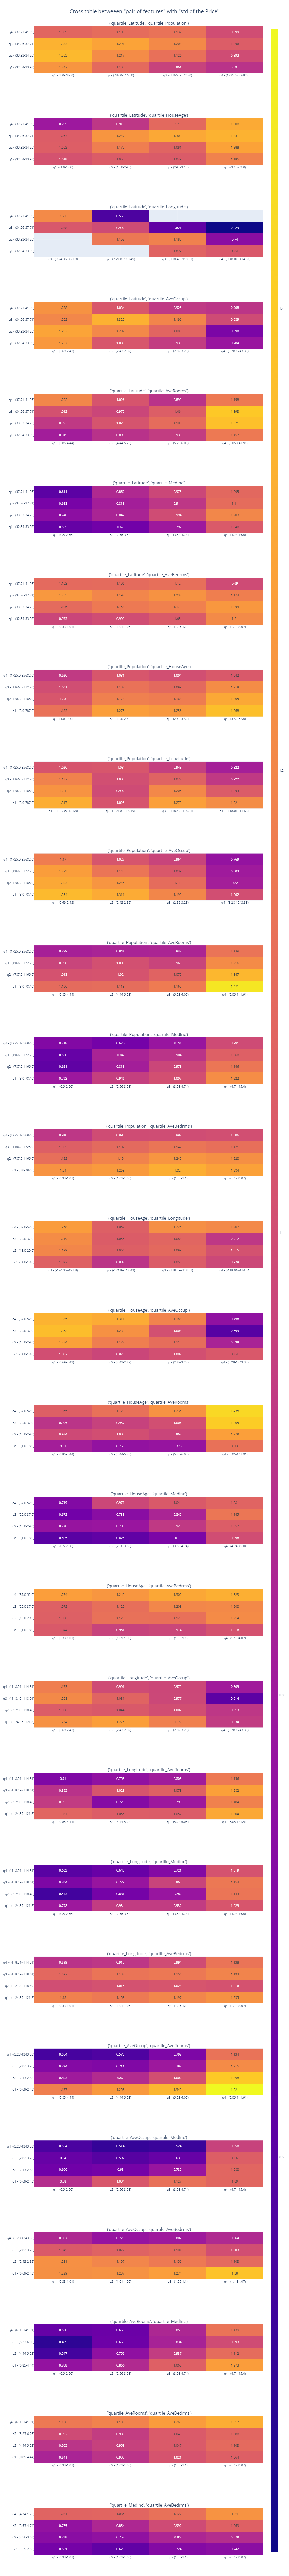

In [17]:
##### STD AGG TARGET
fig_crosstab_std_target_2_features = heatmap_crosstab_aggregation_target_2_features(df = data_percentile_feature, 
                                                                                     target = target, 
                                                                                     agg_target = 'std', 
                                                                                     number_columns = 1)

fig_crosstab_std_target_2_features.write_html("output_eda/5_categorical_analysis/crosstab_std_target_2_features.html")

fig_crosstab_std_target_2_features.show()

## ANALYSIS II. feature1 & feature 2 & feature 3 vs target
Analysis trivariate 3 features categorical vs target

### individual plot

In [18]:
def crosstab_agg_target_3_features(df, feature_index1, feature_index2, feature_column, target, agg_target = 'mean'):
    """
    generate crosstable of aggregation of the target between 3 features (2 features indexes and 1 feature column)

    Args
        ------
    
    Return
        ct_2index (dataframe): dataframe with the cross table with multiindex of 2 features
        ct_2index_reset_index (dataframe): dataframe previous with reset of multiindex
    """
    
    ###### calculate cross table 2 index
    ct_2index = pd.crosstab(index = [df[feature_index1], df[feature_index2]], 
                          columns = df[feature_column], 
                          values = df[target], 
                            aggfunc = agg_target)

    
    ##### transform into plotly heatmap format - only one index
    # generate a dataframe with multiindex into only one index (join intro string the multi index into one index)
    
    # 0. reset index
    ct_2index_reset_index = ct_2index.reset_index()
    
    # 1. transform each categorical column into string.
    ct_2index_reset_index[feature_index1] = ct_2index_reset_index[feature_index1].astype(str)
    ct_2index_reset_index[feature_index2] = ct_2index_reset_index[feature_index2].astype(str)
    
    # 2. add name of the column (beacase actually only show q1, q2, etc)
    ct_2index_reset_index[feature_index1] = feature_index1 + '|' + ct_2index_reset_index[feature_index1]
    ct_2index_reset_index[feature_index2] = feature_index2 + '|' + ct_2index_reset_index[feature_index2]
    
    # 3. combine content of 2 columnas and delete old ones
    ct_2index_reset_index['index'] = ct_2index_reset_index[feature_index1] + '__&&__' + ct_2index_reset_index[feature_index2]
    ct_2index_reset_index.drop(columns = [feature_index1, feature_index2], inplace = True)
    ct_2index_reset_index.set_index('index', inplace = True)

    ##### round 3 decimals
    ct_2index = ct_2index.round(3)
    ct_2index_reset_index = ct_2index_reset_index.round(3)
    
    return ct_2index, ct_2index_reset_index

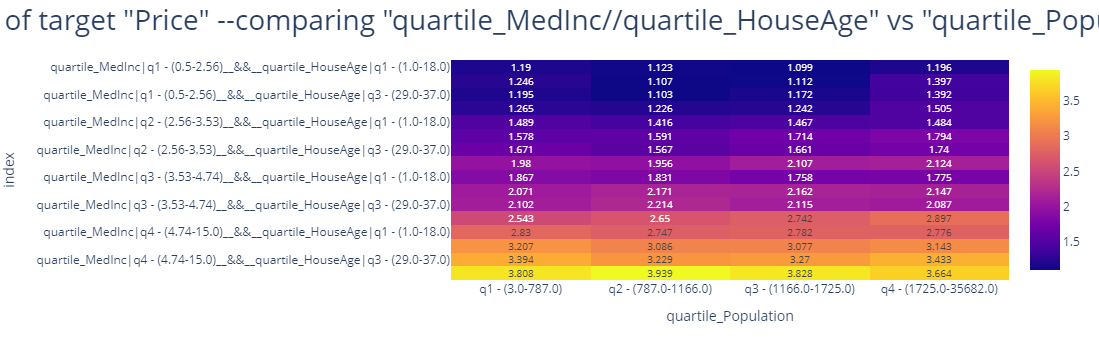

In [19]:
# params
feature_index1_ct = 'quartile_MedInc'
feature_index2_ct = 'quartile_HouseAge'
feature_column_ct = 'quartile_Population'
target_ct = 'Price'  # target is a continous variable
agg_target_ct = 'mean'

# cross table
_, individual_crosstab_agg_target_3_features = crosstab_agg_target_3_features(df = data_percentile_feature, 
                                                                                                 feature_index1= feature_index1_ct, 
                                                                                                 feature_index2 = feature_index2_ct, 
                                                                                                 feature_column = feature_column_ct, 
                                                                                                 target = target_ct, 
                                                                                                 agg_target = agg_target_ct
                                                                                                )

# heatmap
individual_heatmap_agg_target_3_features = plot_heatmap_crosstable_individual(individual_crosstab_agg_target_3_features,
                    name_table = f'"{agg_target_ct}" of target "{target_ct}" --comparing "{feature_index1_ct}//{feature_index2_ct}" vs "{feature_column_ct}"')

# show
individual_heatmap_agg_target_3_features.show()

# save
individual_heatmap_agg_target_3_features.write_html("output_eda/5_categorical_analysis/heatmap_agg_target_3_features.html")

### subplots
IN THIS CASE IS A SMALL MODIFICATION OF THE FUNCTION THAT PLOT 2 FEATURES

In [20]:
def heatmap_crosstab_aggregation_target_3_features(df, target, agg_target = 'mean', number_columns = 1):
    """
    Given a dataframe with columns features + target. Genereate a heatmap of relations between 3 features and one aggregation function of the target
    Detail: 
        Given a dataframe with features categorical, generate a crosstab of aggregation of target between 3 features and plot it in a heatmap
        Calling a individual function to generate a cross table
    
    Args
        df (dataframe): input dataframe with columns features and target
        target (string): target of the dataframe, column that will be delete to plot the relations between only features
        agg_target (string): aggregation function of the target
        number_columns (integer): number of columns. because heatmap could be bigger, plot it into 1 columns by default

    Return
        fig (figure plotly): fig of plotly with the plot generated
    """

    ################# generate a list of tuples of each pair of features to generate the cross table  #####################
    df_only_features = df.drop(columns = target) # delete target of the data
    list_triple_features = list_map_combinations_features(df_only_features.columns.tolist(), 3)

    
    ####################### plot #################################
    
    # calculate number of rows (considering the number of colums passed as args)
    if (len(list_triple_features) % number_columns) != 0:
        number_rows = (len(list_triple_features) // number_columns) + 1
    else:
        number_rows = (len(list_triple_features) // number_columns)

    # create fig to plot
    fig = make_subplots(rows=number_rows, cols=number_columns, 
                        subplot_titles = tuple([str(tupla) for tupla in list_triple_features]) ### title of each subplots
                       )

    ########## for each tuple of features to plot:
    for index_feature, (feature_index1_ct, feature_index2_ct, feature_column_ct) in enumerate(list_triple_features):
        
        # get indexes in the subplot (in plotly the indexes starts in 1)
        row = (index_feature // number_columns) + 1
        column = (index_feature % number_columns) + 1

        
        ## get cross table agg function of target, between 3 features - call the INDIVIDUAL FUNCTION TO GENERATE CROSS TABLE 
        _, ct_agg_target_plotly = crosstab_agg_target_3_features(df = df, 
                               feature_index1= feature_index1_ct, 
                               feature_index2 = feature_index2_ct, 
                               feature_column = feature_column_ct, 
                               target = target, 
                               agg_target = agg_target
                              )
        
        ## tranform cross table freq between pair of features into a heatmap
        fig_aux = px.imshow(ct_agg_target_plotly, text_auto=True, aspect="auto")
        
        # add heatmap to fig global
        fig.add_trace(fig_aux.data[0],
            row = row,
            col = column
        )

    # adjust the shape
    fig.update_layout(
        height = 450 * number_rows,  # largo
        width = 1850 * number_columns,  # ancho
        title_text =  f'Cross table betweeen "pair of features" with "{agg_target} of the {target}"',
        title_x=0.5,
        title_font = dict(size = 20)
    )

    return fig

In [21]:
##### MEAN AGG TARGET
fig_crosstab_mean_target_3_features = heatmap_crosstab_aggregation_target_3_features(df = data_percentile_feature, 
                                                                                     target = target, 
                                                                                     agg_target = 'mean', 
                                                                                     number_columns = 1)

fig_crosstab_mean_target_3_features.write_html("output_eda/5_categorical_analysis/crosstab_mean_target_3_features.html")

#fig_crosstab_mean_target_3_features.show()